# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [8]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

With the 6 features in this dataset PCA and ICA will most likely be able to reduce this down to 3 or less significant features with minimum loss of variance. The reason for this is that some of these items are pretty closely related. For example, people that buy paper goods most likely also buy grocery items. With that the first few PCA dimensions will be fairly high (very significant) and the rest will be very low (not significant). Without doing any calculations, the first PCA feature will probably be made up of Detergent_Paper, Grocery, and Milk because those are all staples that people need.  For ICA the first component will most likely be large volume grocery stores made up of Detergents_Paper, Grocery, and Milk.  These are staple items that everyone needs.  The second second component could be something like restaurants that would need high volume of Fresh items.

###PCA

In [9]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
stnd = StandardScaler()
data_stnd = stnd.fit_transform(data)

pca = PCA(n_components=np.shape(data_stnd)[1])
pca.fit(data_stnd)

# Print the components and the amount of variance in the data contained in each dimension
print "PCA components:"
print pca.components_
print ""
print "PCA explained variance ratio:"
print pca.explained_variance_ratio_

PCA components:
[[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]
 [-0.52793212 -0.08316765  0.14608818 -0.61127764  0.25523316 -0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [ 0.04868278 -0.82657929  0.31499943  0.02793224  0.33964012  0.31470051]
 [ 0.03602539  0.03804019 -0.72174458  0.01563715  0.68589373  0.07513412]]

PCA explained variance ratio:
[ 0.44082893  0.283764    0.12334413  0.09395504  0.04761272  0.01049519]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

After scaling the data, the variance drops of very quickly.  The first two PCA features make 72.4% of the total variance.  Since this makes up such a large portion of the total variance only 2 features would be used in the final dataset.  This would make it into a 2 dimensional problem and it would be easier to visualize what is happening.  This is a reasonable cutoff due the strengths of the first two dimensions. 

**3)** What do the dimensions seem to represent? How can you use this information?

The dimensions seem to represent two categories of items.  Those two categories are made up, discussed later in the report, of the features Detergents_Paper, Grocery, and Milk for the first component and the second component is made up of the features Delicatessen, Fresh, and Frozen.  This can be very useful in the fact that customer base is made up of two groups.  These first  two PCA components would most likely be made up of restaurants and convenience stores.  Restaurants would need fresh foods where convenience stores deal mostly in longer term staples.  The first component, which explains 44.1% of the variance, is the large volume customers that purchase Detergents_Paper, Grocery, and Milk items.  The second component, which explains 28.4% of the variance, would be the slightly less volume customers that purchase Delicatessen, Fresh, and Frozen items.

###ICA

ICA components:
[[ 0.00260045 -0.01305746  0.06431417  0.00176704 -0.00790475 -0.00473342]
 [ 0.00367038 -0.01677436 -0.11314042  0.00712345  0.13439745  0.01594585]
 [-0.00189744 -0.07287525  0.05450359  0.00183477 -0.01465023  0.0172135 ]
 [-0.05030326  0.00640234  0.00648235  0.00325456 -0.01042646  0.00291546]
 [-0.0048644  -0.0016145  -0.00553501 -0.00242778  0.00230922  0.05096183]
 [ 0.01093164  0.00104722 -0.00730628 -0.05412076  0.0025728   0.01688358]]


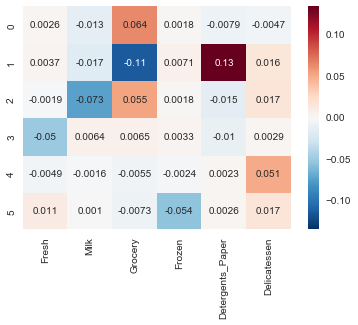

In [10]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
icaData = data
icaData -= icaData.mean(axis=0)
icaData /= icaData.std(axis=0)
ica = FastICA(n_components=6, random_state=0)
ica.fit_transform(icaData)

# Print the independent components
print "ICA components:"
print ica.components_

import seaborn as sns
sns.heatmap(pd.DataFrame(ica.components_, columns= list(data.columns)), annot=True)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

The ICA was broken down into six components.  These components try to show what 6 distinct groups would look like.  The components and their weightings can be seen on the the heatmap above.  The first component is made up of mostly Grocery items.  This could be something like a convenience store.  The second component is made up of mostly Detergents_Paper items. This could be an office space.  The third component is made up of mostly Grocery and a little bit of Delicatessen items.  This could be convenience store.  The fourth component is made up of mostly Milk and Grocery items and a little bit of Frozen and Delicatessen items.  This could be restaurant that sells a lot of Ice Cream products or ice cream parlor.  The fifth component is made up of Delicatessen items.  This could be a candy store.  The sixth and final component is made up of Delicatessen and Fresh items.  This could be bakery or donut shop.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

The advantages of using K Means is that you will get a definite dividing line between the different classifications.  This is useful for classifying items and then creating a model based on that.  K Means is also a simpler model.  The advantages of Gaussian Mixture Models (GMM) is that you don't force a particular point into a definite group.  The different classification slowly fade into each other.  This helps show where areas of uncertainty are.  K means was chosen so that we get a clear cut groups.  K Means is a simpler model that runs faster than GMM.  K Means’ only tuning parameter is the number of clusters where GMM has many tuning parameters.  K Means is also scalable where GMM is not.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.


In [11]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data)
print "Head of Reduced Data:"
print reduced_data[:5]  # print upto 10 elements
print ""

Head of Reduced Data:
[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]]



In [12]:
#Create function to plot PCA data
def PCAPlot(maindf, df, num_clusters):
    # TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
    # The visualizer below assumes your clustering object is named 'clusters'

    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = df[:, 0].min() - 1, df[:, 0].max() + 1
    y_min, y_max = df[:, 1].min() - 1, df[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    clusters = KMeans(init='k-means++', n_clusters = num_clusters, random_state=0)
    #print clusters
    clusters.fit(df)
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # TODO: Find the centroids for KMeans or the cluster means for GMM 
    centroids = clusters.cluster_centers_
    print "Centroids:"
    print centroids.round()
    print ""
    
    labels = clusters.labels_
    labels.astype(int)
    
    print "Sample vectors:"
    for i in range(0,num_clusters):
        subset1 = maindf[labels == i]
        print "Cluster {}".format(i)
        print subset1[:3].round()
        print ""
        print "Mean values:"
        print subset1.mean().round()
        print ""
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(df[:, 0], df[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

Centroids:
[[  4175.   -211.]
 [-24088.   1218.]]

Sample vectors:
Cluster 0
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844

Mean values:
Fresh               7944
Milk                5152
Grocery             7536
Frozen              2484
Detergents_Paper    2873
Delicatessen        1214
dtype: float64

Cluster 1
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
4   22615   5410     7198    3915              1777          5185
12  31714  12319    11757     287              3881          2931
14  24653   9465    12091     294              5058          2168

Mean values:
Fresh               35401
Milk                 9514
Grocery             10346
Frozen               6463
Detergents_Paper     2933
Delicatessen         3317
dtype: float64



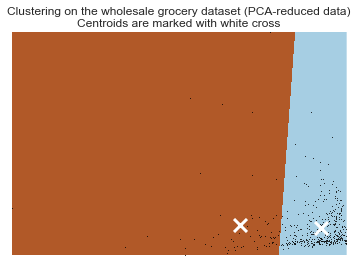

Centroids:
[[  1341.  25261.]
 [  4165.  -3105.]
 [-23979.  -4446.]]

Sample vectors:
Cluster 0
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
9    6006  11093    18881    1159              7425          2098
23  26373  36423    22019    5154              4337         16523
28   4113  20484    25957    1158              8604          5206

Mean values:
Fresh                8027
Milk                18376
Grocery             27343
Frozen               2014
Detergents_Paper    12315
Delicatessen         2233
dtype: float64

Cluster 1
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844

Mean values:
Fresh               8250
Milk                3801
Grocery             5249
Frozen              2572
Detergents_Paper    1755
Delicatessen        1137
dtype: float64

Cluster 

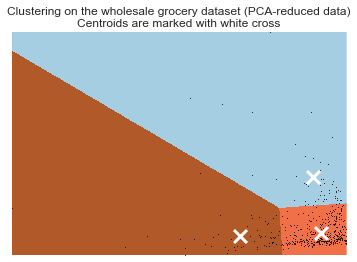

In [13]:
#Plot with 2 and 3 clusters
maindata = pd.read_csv("wholesale-customers.csv")
PCAPlot(maindata,reduced_data,2)
PCAPlot(maindata,reduced_data,3)


Two clusters were chosen based on the PCA results described above.  In the 2 cluster model some of the samples seem to to show that it is splitting the data between Fresh items between high and low values.  The other items seem to be less well defined.  Based on the mean values Fresh and Frozen seem to be how the features are separated.

**7)** What are the central objects in each cluster? Describe them as customers.

In the final K Means model that was chosen, there are two definite groups.  These groups can be broken down into two groups of customers.  The first group (Group 1)  buys Detergents_Paper, Grocery, and Milk items.  The second  group (Group 2) buys Delicatessen, Fresh, and Frozen items.  This can be shown in plotting the top two PCA components, shown below along with the arrows showing how those features contributed to the PCA components.  The central objects in each cluster are at the average distance from all the points in that group.  These customers serve two different groups of people.  Group 1 seems to be serving fresh items that need to be served at a quicker pace.  These items are more luxury items.  Group 2 seems to sell items that are more staples of normal households.  These items are necessities.  

(-2.0, 1.0)

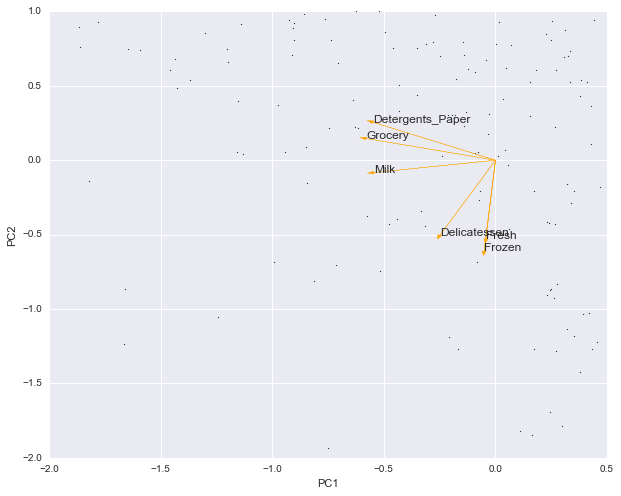

In [14]:
def biplot(df):
    # Fit on 2 components
    pca = PCA(n_components=2).fit(df)
    
    # Plot transformed/projected data
    ax = pd.DataFrame(
        pca.transform(df),
        columns=['PC1', 'PC2']
    ).plot(kind='scatter', x='PC1', y='PC2', figsize=(10, 8), s=0.8)

    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, width=0.001, fc='orange', ec='orange')
        ax.annotate(df.columns[i], (pc1, pc2), size=12)

    return ax

df = pd.DataFrame(data_stnd, columns=['Fresh', 'Milk' , 'Grocery' ,'Frozen' , 'Detergents_Paper' , 'Delicatessen'])

ax = biplot(df)
# Play around with the ranges for scaling the plot
ax.set_xlim([-2.0, 0.5])
ax.set_ylim([-2.0, 1.0])

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

PCA seemed to give the most insight into the data.  It was able to break the 6 features into an easier to understand 2 dimensional plot.  This really helped quickly and easily see where the different market segments were. 

**9)** How would you use that technique to help the company design new experiments?

This technique would help design new experiments by breaking up the groups into two different populations.  This would allow for any changes, such as changing the delivery method and time, to be compared within that group even though Group 2 might not buy as much Group 1.  This would allow for changes to be seen easier instead of within a group. Each group could have a control and a test group.  

**10)** How would you use that data to help you predict future customer needs?

Knowing that the two groups have different needs, marketing could be more finely tuned to those groups.  Customers that buy large amounts of frozen items could be shown more fresh items and customers that buy large amounts of paper goods could be shown more grocery items.  This also might help speed up delivery.  Instead of having one delivery truck carry all the items and deliver them there could be two smaller delivery trucks that carry items that the group is more interested in.  Supervised learning could be done to see how much someone would buy of a product based on their spending habits.  

The groups found with K Means could also be used to label the current dataset.  This dataset could be used to then train a supervised learning algorithm and this algorithm could be used to help better predict new clients needs.  